In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
te = pd.read_csv('T_esla.csv')
te.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
te['Date'] = pd.to_datetime(te['Date'])

In [5]:
print(f'Dataframe contains stock prices between {te.Date.min()} {te.Date.max()}') 
print(f'Total days = {(te.Date.max()  - te.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2017-03-17 00:00:00
Total days = 2453 days


In [6]:
te.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


<Axes: >

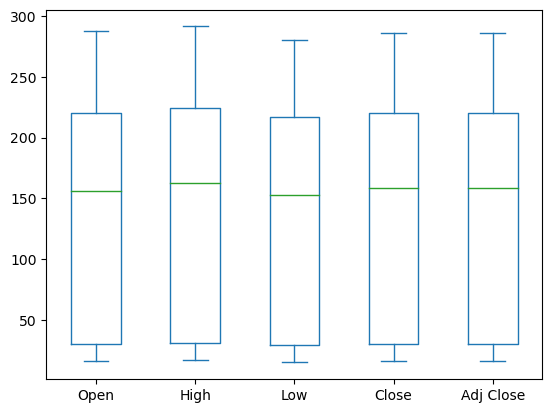

In [7]:
te[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':te['Date'], 'y':te['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [9]:
iplot(plot)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
X = np.array(te.index).reshape(-1,1)
Y = te['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [16]:
iplot(plot2)

In [17]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.792990040984633	0.7956409009085726
MSE       1836.9223967033354	1823.8784763131882

